In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
from sklearn.preprocessing import label_binarize

In [ ]:
df = pd.read_csv("UAVIDS-2025_0.csv")

# New Section

In [ ]:
print("Shape:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nDataset Info:")
df.info()

Shape: (64228, 23)

Column names:
 ['FlowID', 'FlowDuration/s', 'SrcAddr', 'SrcPort', 'DstAddr', 'DstPort', 'Protocol', 'TxPackets', 'RxPackets', 'LostPackets', 'TxBytes', 'RxBytes', 'TxPacketRate/s', 'RxPacketRate/s', 'TxByteRate/s', 'RxByteRate/s', 'MeanDelay/s', 'MeanJitter/s', 'Throughput/Kbps', 'MeanPacketSize', 'PacketDropRate', 'AverageHopCount', 'label']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64228 entries, 0 to 64227
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FlowID           64228 non-null  int64  
 1   FlowDuration/s   64228 non-null  float64
 2   SrcAddr          64228 non-null  object 
 3   SrcPort          64228 non-null  int64  
 4   DstAddr          64228 non-null  object 
 5   DstPort          64228 non-null  int64  
 6   Protocol         64228 non-null  object 
 7   TxPackets        64228 non-null  int64  
 8   RxPackets        64228 non-null  int64  
 9   

In [ ]:
df.head()

,FlowID,FlowDuration/s,SrcAddr,SrcPort,DstAddr,DstPort,Protocol,TxPackets,RxPackets,LostPackets,...,RxPacketRate/s,TxByteRate/s,RxByteRate/s,MeanDelay/s,MeanJitter/s,Throughput/Kbps,MeanPacketSize,PacketDropRate,AverageHopCount,label
0,1,175.007,192.168.0.150,9,192.168.0.16,9,UDP,251,215,36,...,1.22853,109.002,93.3679,0.022152,0.024406,0.746943,76.0,0.143426,0.074419,Sybil Attack
1,2,175.008,192.168.0.150,9,192.168.0.19,9,UDP,251,223,28,...,1.27423,109.001,96.8411,0.019637,0.018678,0.774729,76.0,0.111554,0.053812,Sybil Attack
2,3,175.010,192.168.0.150,9,192.168.0.24,9,UDP,251,224,27,...,1.27993,108.999,97.2744,0.023701,0.023917,0.778195,76.0,0.107570,0.044643,Sybil Attack
3,4,175.014,192.168.0.150,9,192.168.0.34,9,UDP,251,212,39,...,1.21133,108.997,92.0614,0.034014,0.025408,0.736491,76.0,0.155378,0.033019,Sybil Attack
4,5,175.017,192.168.0.150,9,192.168.0.39,9,UDP,251,215,36,...,1.22845,108.995,93.3623,0.034396,0.024933,0.746899,76.0,0.143426,0.009302,Sybil Attack


In [ ]:
df.head().to_csv("head.csv", index=False)

In [ ]:
df.tail()

,FlowID,FlowDuration/s,SrcAddr,SrcPort,DstAddr,DstPort,Protocol,TxPackets,RxPackets,LostPackets,...,RxPacketRate/s,TxByteRate/s,RxByteRate/s,MeanDelay/s,MeanJitter/s,Throughput/Kbps,MeanPacketSize,PacketDropRate,AverageHopCount,label
64223,64224,1777.23,192.168.0.11,654,192.168.0.44,654,UDP,42,40,2,...,0.022507,1.056700,1.007190,0.027740,0.027331,0.008057,44.0,0.047619,0.025000,Normal Traffic
64224,64225,1715.08,192.168.0.27,654,192.168.0.1,654,UDP,43,40,3,...,0.023323,0.999371,0.925905,0.056927,0.034775,0.007407,39.0,0.069767,0.025000,Normal Traffic
64225,64226,1710.00,192.168.0.13,9,192.168.0.1,9,UDP,18,15,3,...,0.008772,0.800000,0.666667,0.001269,0.002009,0.005333,76.0,0.166667,0.133333,Normal Traffic
64226,64227,1640.00,192.168.0.13,9,192.168.0.5,9,UDP,12,10,2,...,0.006098,0.556097,0.463415,0.006538,0.006642,0.003707,76.0,0.166667,0.200000,Normal Traffic
64227,64228,1575.00,192.168.0.13,9,192.168.0.7,9,UDP,14,14,0,...,0.008880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,FlowID,FlowDuration/s,SrcPort,DstPort,TxPackets,RxPackets,LostPackets,TxBytes,RxBytes,TxPacketRate/s,RxPacketRate/s,TxByteRate/s,RxByteRate/s,MeanDelay/s,MeanJitter/s,Throughput/Kbps,MeanPacketSize,PacketDropRate,AverageHopCount
count,64228.000000,64228.000000,64228.000000,64228.000000,64228.000000,64228.000000,64228.000000,6.422800e+04,64228.000000,64228.000000,64228.000000,64227.000000,64227.000000,64227.000000,64227.000000,64227.000000,64227.000000,64227.000000,64227.000000
mean,32114.500000,505.154157,104.603164,104.603164,367.815890,309.997197,57.613580,2.757094e+04,23456.959659,1.039888,0.658298,76.386836,49.298632,0.257457,0.174013,0.394389,71.559266,0.406936,0.402172
std,18541.170882,521.169504,229.183100,229.183100,660.834831,531.498043,288.345403,4.711309e+04,40283.059245,5.099289,1.997147,307.727840,116.016851,0.537923,0.394091,0.928134,10.671339,0.319850,0.811370
min,1.000000,2.002720,9.000000,9.000000,2.000000,1.000000,0.000000,7.800000e+01,30.000000,0.002931,0.000573,0.122811,0.027510,0.000070,0.000000,0.000220,30.000000,0.000000,0.000000
25%,16057.750000,132.019000,9.000000,9.000000,10.000000,3.000000,5.000000,7.600000e+02,228.000000,0.043536,0.014630,3.276040,1.016610,0.019515,0.003556,0.008133,76.000000,0.111111,0.002604
50%,32114.500000,228.514500,9.000000,9.000000,36.000000,17.000000,12.000000,2.256000e+03,1064.000000,0.224718,0.047619,12.604700,3.149630,0.051201,0.034036,0.025197,76.000000,0.384615,0.037517
75%,48171.250000,834.403000,9.000000,9.000000,466.000000,365.000000,67.000000,3.526400e+04,27740.000000,1.430010,1.255640,108.680000,95.428500,0.271643,0.156059,0.763428,76.000000,0.688211,0.500000
max,64228.000000,1792.390000,654.000000,654.000000,44793.000000,10783.000000,42757.000000,2.284425e+06,549837.000000,807.531000,318.338000,41180.100000,16231.300000,10.168500,6.717600,129.850000,76.000000,1.333330,58.000000


In [ ]:
df.describe(include=[np.number])

,FlowID,FlowDuration/s,SrcPort,DstPort,TxPackets,RxPackets,LostPackets,TxBytes,RxBytes,TxPacketRate/s,RxPacketRate/s,TxByteRate/s,RxByteRate/s,MeanDelay/s,MeanJitter/s,Throughput/Kbps,MeanPacketSize,PacketDropRate,AverageHopCount
count,64228.000000,64228.000000,64228.000000,64228.000000,64228.000000,64228.000000,64228.000000,6.422800e+04,64228.000000,64228.000000,64228.000000,64227.000000,64227.000000,64227.000000,64227.000000,64227.000000,64227.000000,64227.000000,64227.000000
mean,32114.500000,505.154157,104.603164,104.603164,367.815890,309.997197,57.613580,2.757094e+04,23456.959659,1.039888,0.658298,76.386836,49.298632,0.257457,0.174013,0.394389,71.559266,0.406936,0.402172
std,18541.170882,521.169504,229.183100,229.183100,660.834831,531.498043,288.345403,4.711309e+04,40283.059245,5.099289,1.997147,307.727840,116.016851,0.537923,0.394091,0.928134,10.671339,0.319850,0.811370
min,1.000000,2.002720,9.000000,9.000000,2.000000,1.000000,0.000000,7.800000e+01,30.000000,0.002931,0.000573,0.122811,0.027510,0.000070,0.000000,0.000220,30.000000,0.000000,0.000000
25%,16057.750000,132.019000,9.000000,9.000000,10.000000,3.000000,5.000000,7.600000e+02,228.000000,0.043536,0.014630,3.276040,1.016610,0.019515,0.003556,0.008133,76.000000,0.111111,0.002604
50%,32114.500000,228.514500,9.000000,9.000000,36.000000,17.000000,12.000000,2.256000e+03,1064.000000,0.224718,0.047619,12.604700,3.149630,0.051201,0.034036,0.025197,76.000000,0.384615,0.037517
75%,48171.250000,834.403000,9.000000,9.000000,466.000000,365.000000,67.000000,3.526400e+04,27740.000000,1.430010,1.255640,108.680000,95.428500,0.271643,0.156059,0.763428,76.000000,0.688211,0.500000
max,64228.000000,1792.390000,654.000000,654.000000,44793.000000,10783.000000,42757.000000,2.284425e+06,549837.000000,807.531000,318.338000,41180.100000,16231.300000,10.168500,6.717600,129.850000,76.000000,1.333330,58.000000


In [ ]:
df.describe(include=['object'])

,SrcAddr,DstAddr,Protocol,label
count,64228,64228,64228,64227
unique,130,110,1,5
top,192.168.0.150,192.168.0.24,UDP,Sybil Attack
freq,1470,1032,64228,22407


In [ ]:
df.isnull().sum()

,0
FlowID,0
FlowDuration/s,0
SrcAddr,0
SrcPort,0
DstAddr,0
DstPort,0
Protocol,0
TxPackets,0
RxPackets,0
LostPackets,0


In [ ]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [ ]:
df['label'].value_counts()

,count
label,
Sybil Attack,22407
Blackhole Attack,16209
Wormhole Attack,15442
Normal Traffic,6015
Flooding Attack,4154


In [ ]:
df['label'].value_counts(normalize=True) * 100

,proportion
label,
Sybil Attack,34.887197
Blackhole Attack,25.237050
Wormhole Attack,24.042848
Normal Traffic,9.365220
Flooding Attack,6.467685


In [ ]:
df.dtypes

,0
FlowID,int64
FlowDuration/s,float64
SrcAddr,object
SrcPort,int64
DstAddr,object
DstPort,int64
Protocol,object
TxPackets,int64
RxPackets,int64
LostPackets,int64


In [ ]:
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Constant columns:", constant_cols)

Constant columns: ['Protocol']


In [ ]:
df.describe().T.sort_values("max", ascending=False).head()

,count,mean,std,min,25%,50%,75%,max
TxBytes,64228.0,27570.944199,47113.088406,78.0,760.00,2256.0,35264.00,2284425.0
RxBytes,64228.0,23456.959659,40283.059245,30.0,228.00,1064.0,27740.00,549837.0
FlowID,64228.0,32114.500000,18541.170882,1.0,16057.75,32114.5,48171.25,64228.0
TxPackets,64228.0,367.815890,660.834831,2.0,10.00,36.0,466.00,44793.0
LostPackets,64228.0,57.613580,288.345403,0.0,5.00,12.0,67.00,42757.0


In [ ]:
corr = df.corr(numeric_only=True)
corr

,FlowID,FlowDuration/s,SrcPort,DstPort,TxPackets,RxPackets,LostPackets,TxBytes,RxBytes,TxPacketRate/s,RxPacketRate/s,TxByteRate/s,RxByteRate/s,MeanDelay/s,MeanJitter/s,Throughput/Kbps,MeanPacketSize,PacketDropRate,AverageHopCount
FlowID,1.000000,0.083950,0.093771,0.093771,-0.460956,-0.533504,-0.073030,-0.491626,-0.535994,0.013628,-0.078759,0.017971,-0.103546,0.106686,0.111157,-0.103546,-0.109835,0.176779,0.149953
FlowDuration/s,0.083950,1.000000,0.091957,0.091957,0.418726,0.490665,0.055699,0.448338,0.491264,-0.059260,-0.021660,-0.068681,-0.023904,-0.226212,-0.146404,-0.023904,-0.113403,-0.518197,-0.208227
SrcPort,0.093771,0.091957,1.000000,1.000000,-0.173898,-0.224644,0.014386,-0.204869,-0.231381,-0.031502,-0.099784,-0.060286,-0.145691,-0.081864,-0.104327,-0.145691,-0.997567,0.237554,-0.149347
DstPort,0.093771,0.091957,1.000000,1.000000,-0.173898,-0.224644,0.014386,-0.204869,-0.231381,-0.031502,-0.099784,-0.060286,-0.145691,-0.081864,-0.104327,-0.145691,-0.997567,0.237554,-0.149347
TxPackets,-0.460956,0.418726,-0.173898,-0.173898,1.000000,0.903105,0.622948,0.988558,0.893582,0.340940,0.347802,0.320704,0.385290,-0.220165,-0.199847,0.385290,0.176118,-0.435573,-0.238769
RxPackets,-0.533504,0.490665,-0.224644,-0.224644,0.903105,1.000000,0.226692,0.953203,0.999166,0.139763,0.291714,0.146702,0.347861,-0.244008,-0.220005,0.347861,0.224414,-0.540126,-0.266391
LostPackets,-0.073030,0.055699,0.014386,0.014386,0.622948,0.226692,1.000000,0.505679,0.206483,0.520014,0.259265,0.461413,0.241775,-0.054842,-0.052383,0.241775,-0.008947,-0.003317,-0.056153
TxBytes,-0.491626,0.448338,-0.204869,-0.204869,0.988558,0.953203,0.505679,1.000000,0.947733,0.269071,0.313775,0.262798,0.361852,-0.233220,-0.210867,0.361852,0.206257,-0.472363,-0.251692
RxBytes,-0.535994,0.491264,-0.231381,-0.231381,0.893582,0.999166,0.206483,0.947733,1.000000,0.113328,0.264639,0.124654,0.324723,-0.244000,-0.219865,0.324723,0.231062,-0.542268,-0.266015
TxPacketRate/s,0.013628,-0.059260,-0.031502,-0.031502,0.340940,0.139763,0.520014,0.269071,0.113328,1.000000,0.753910,0.980510,0.704896,-0.054006,-0.058974,0.704896,0.035026,-0.026569,-0.043418


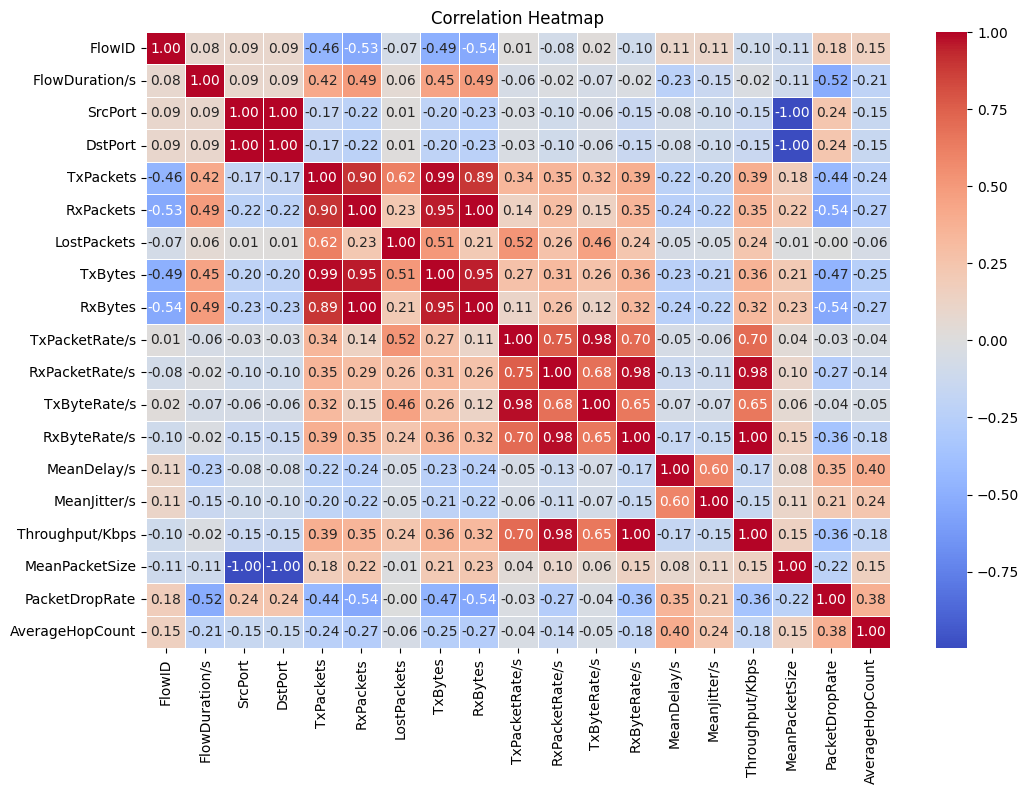

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df = df.dropna()

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical:", num_cols)
print("Categorical:", cat_cols)

Numerical: ['FlowID', 'FlowDuration/s', 'SrcPort', 'DstPort', 'TxPackets', 'RxPackets', 'LostPackets', 'TxBytes', 'RxBytes', 'TxPacketRate/s', 'RxPacketRate/s', 'TxByteRate/s', 'RxByteRate/s', 'MeanDelay/s', 'MeanJitter/s', 'Throughput/Kbps', 'MeanPacketSize', 'PacketDropRate', 'AverageHopCount']
Categorical: ['SrcAddr', 'DstAddr', 'Protocol', 'label']


In [ ]:
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
df.head(10)

,FlowID,FlowDuration/s,SrcAddr,SrcPort,DstAddr,DstPort,Protocol,TxPackets,RxPackets,LostPackets,...,RxPacketRate/s,TxByteRate/s,RxByteRate/s,MeanDelay/s,MeanJitter/s,Throughput/Kbps,MeanPacketSize,PacketDropRate,AverageHopCount,label
0,1,175.007,18,9,18,9,0,251,215,36,...,1.22853,109.002,93.3679,0.022152,0.024406,0.746943,76.0,0.143426,0.074419,3
1,2,175.008,18,9,21,9,0,251,223,28,...,1.27423,109.001,96.8411,0.019637,0.018678,0.774729,76.0,0.111554,0.053812,3
2,3,175.010,18,9,27,9,0,251,224,27,...,1.27993,108.999,97.2744,0.023701,0.023917,0.778195,76.0,0.107570,0.044643,3
3,4,175.014,18,9,38,9,0,251,212,39,...,1.21133,108.997,92.0614,0.034014,0.025408,0.736491,76.0,0.155378,0.033019,3
4,5,175.017,18,9,43,9,0,251,215,36,...,1.22845,108.995,93.3623,0.034396,0.024933,0.746899,76.0,0.143426,0.009302,3
5,6,175.018,18,9,48,9,0,251,215,36,...,1.22845,108.995,93.3618,0.035486,0.026488,0.746895,76.0,0.143426,0.009302,3
6,7,175.021,18,9,62,9,0,251,223,28,...,1.27414,108.993,96.8343,0.036827,0.027043,0.774675,76.0,0.111554,0.058296,3
7,8,175.025,18,9,72,9,0,251,225,26,...,1.28553,108.990,97.7004,0.045589,0.028226,0.781603,76.0,0.103586,0.008889,3
8,9,175.007,19,9,18,9,0,251,215,36,...,1.22853,109.002,93.3679,0.022185,0.024406,0.746943,76.0,0.143426,0.074419,3
9,10,175.008,19,9,21,9,0,251,223,28,...,1.27423,109.001,96.8411,0.019671,0.018678,0.774729,76.0,0.111554,0.053812,3


In [ ]:
target_column = "label"

X = df.drop(columns=[target_column])
y = df[target_column]

In [ ]:
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
X_train.shape

(51381, 22)

In [ ]:
X_test.shape

(12846, 22)

In [ ]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


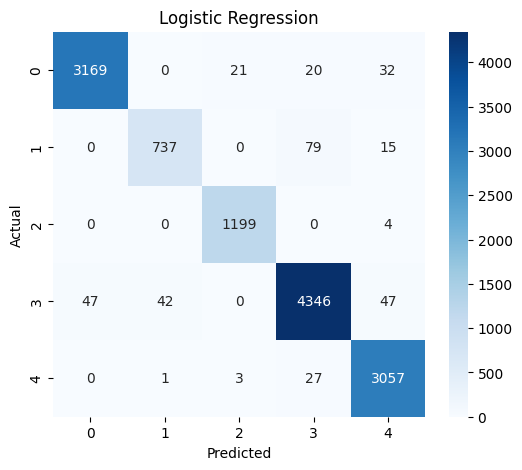

In [ ]:
log_clf = LogisticRegression(max_iter=500)
log_clf.fit(X_train, y_train)
log_pred = log_clf.predict(X_test)
plot_conf_matrix(y_test, log_pred, "Logistic Regression")

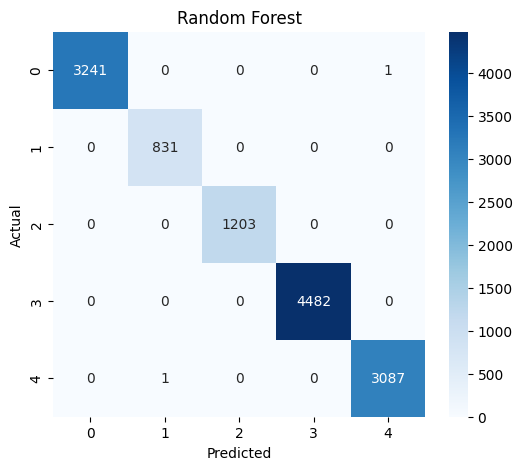

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
plot_conf_matrix(y_test, rf_pred, "Random Forest")

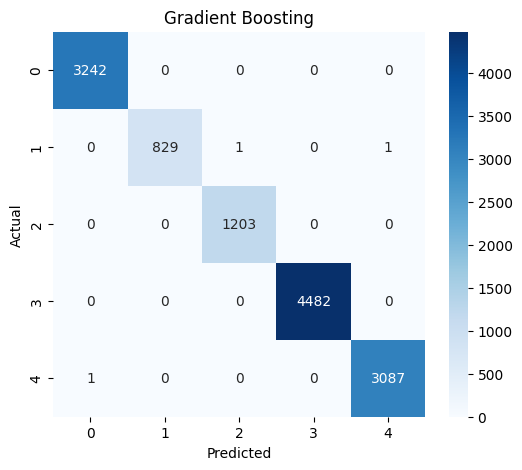

In [ ]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
plot_conf_matrix(y_test, gb_pred, "Gradient Boosting")

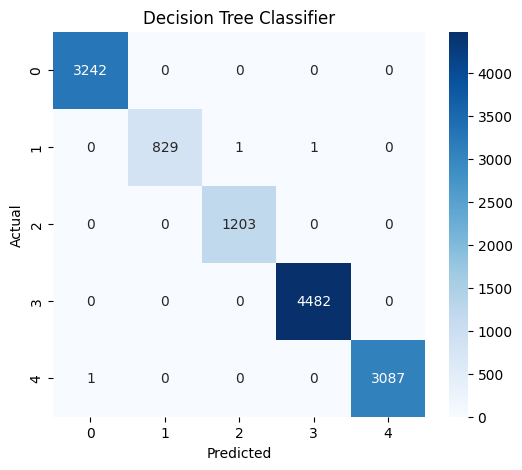

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=0, criterion="entropy")
tree_clf.fit(X_train, y_train)
tree_pred = tree_clf.predict(X_test)
plot_conf_matrix(y_test, tree_pred, "Decision Tree Classifier")

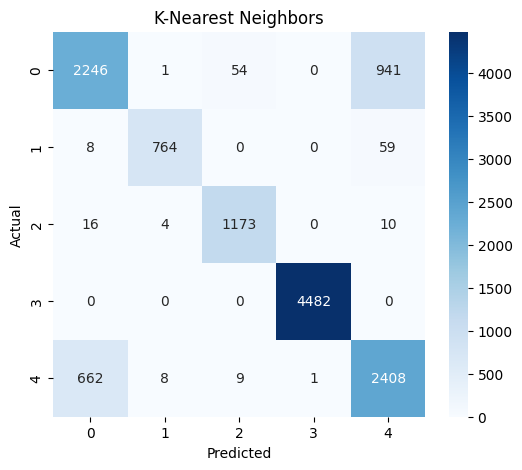

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)
plot_conf_matrix(y_test, knn_pred, "K-Nearest Neighbors")

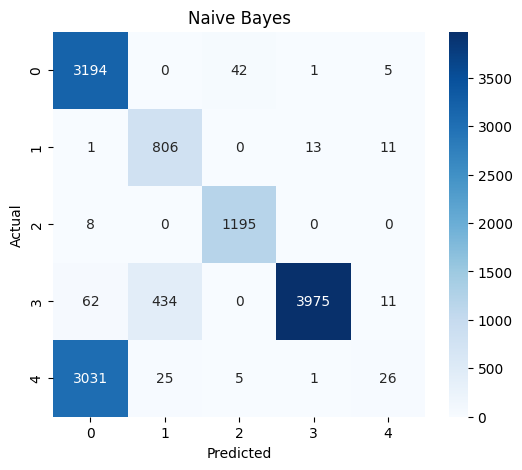

In [ ]:
nvb_clf = GaussianNB()
nvb_clf.fit(X_train, y_train)
nvb_pred = nvb_clf.predict(X_test)
plot_conf_matrix(y_test, nvb_pred, "Naive Bayes")

In [ ]:
def evaluate_model(model_name, y_true, y_pred):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1-Score": f1_score(y_true, y_pred, average='weighted'),
    }

results = []

results.append(evaluate_model("Logistic Regression", y_test, log_pred))
results.append(evaluate_model("Random Forest", y_test, rf_pred))
results.append(evaluate_model("Gradient Boosting", y_test, gb_pred))
results.append(evaluate_model("Decision Tree Classifier", y_test, tree_pred))
results.append(evaluate_model("K-Nearest Neighbors", y_test, knn_pred))
results.append(evaluate_model("Naive Bayes", y_test, nvb_pred))


results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.973688,0.973610,0.973688,0.973552
1,Random Forest,0.999844,0.999844,0.999844,0.999844
2,Gradient Boosting,0.999766,0.999767,0.999766,0.999766
3,Decision Tree Classifier,0.999766,0.999767,0.999766,0.999766
4,K-Nearest Neighbors,0.861980,0.863986,0.861980,0.861974
5,Naive Bayes,0.715865,0.724868,0.715865,0.641703


In [ ]:
results_df.to_csv("results.csv", index=False)

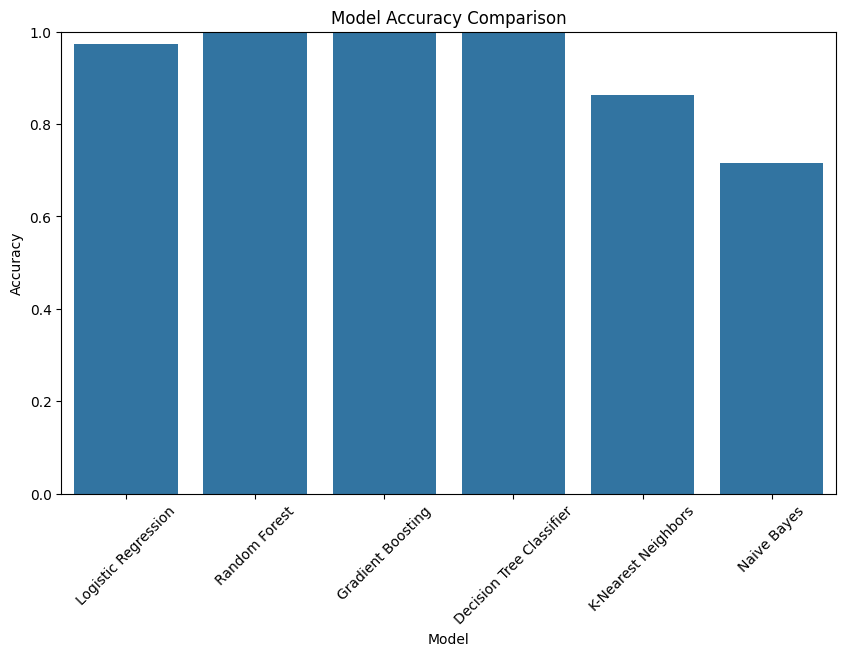

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x="Model", y="Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

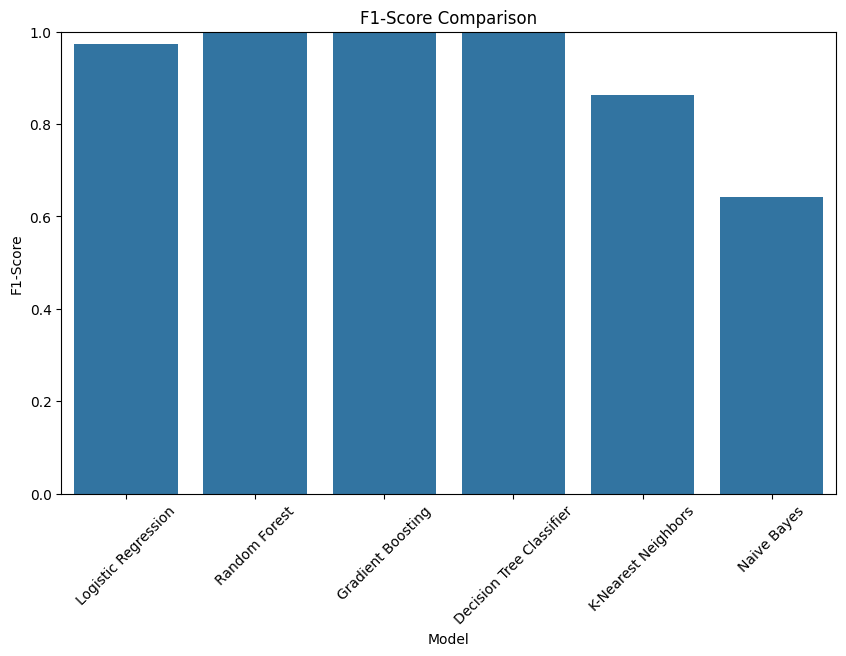

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x="Model", y="F1-Score")
plt.title("F1-Score Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

In [ ]:
best_model = results_df.loc[results_df["Accuracy"].idxmax()]
best_model

,1
Model,Random Forest
Accuracy,0.999844
Precision,0.999844
Recall,0.999844
F1-Score,0.999844


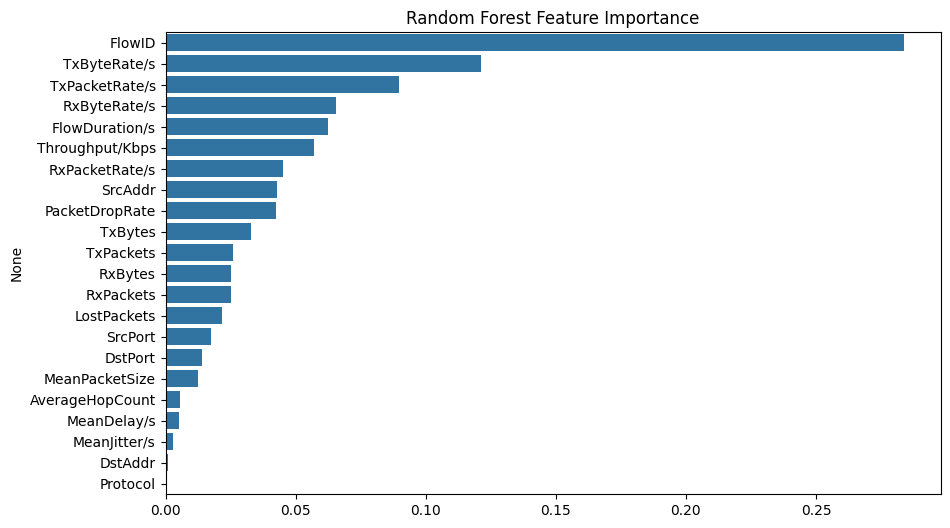

In [ ]:
rf_importances = rf_clf.feature_importances_
rf_sorted_idx = np.argsort(rf_importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(
    x=rf_importances[rf_sorted_idx],
    y=X_train.columns[rf_sorted_idx]
)
plt.title("Random Forest Feature Importance")
plt.show()


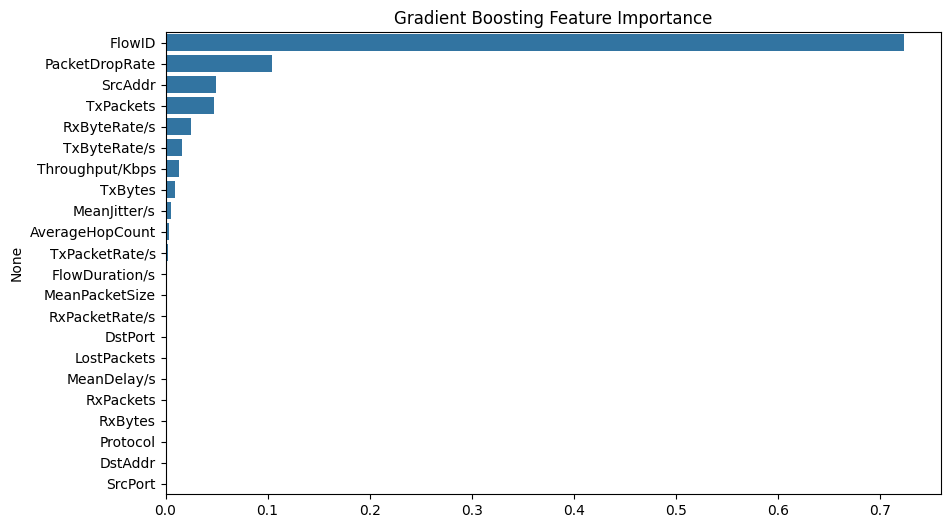

In [ ]:
gb_importances = gb_clf.feature_importances_
gb_sorted_idx = np.argsort(gb_importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(
    x=gb_importances[gb_sorted_idx],
    y=X_train.columns[gb_sorted_idx]
)
plt.title("Gradient Boosting Feature Importance")
plt.show()


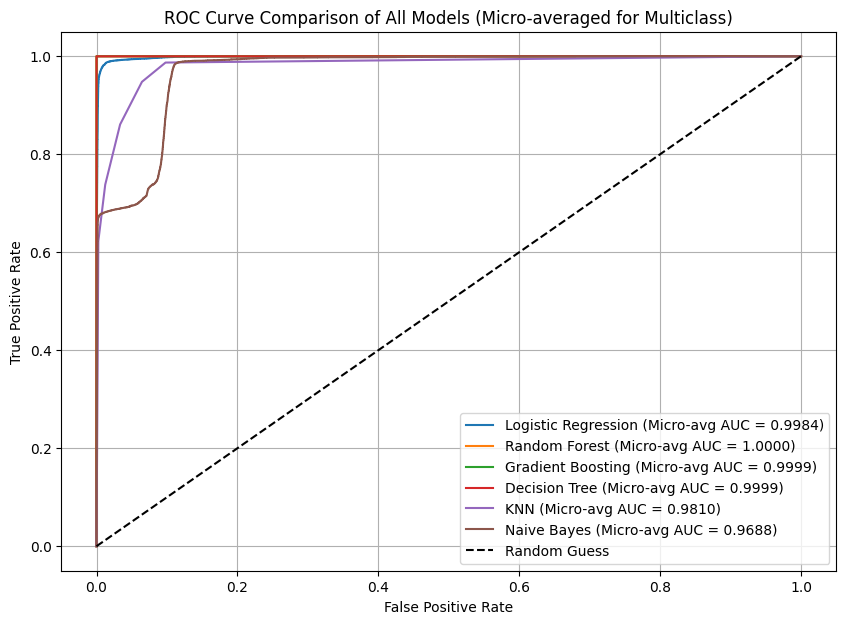

In [ ]:
plt.figure(figsize=(10, 7))

models = {
    "Logistic Regression": log_clf,
    "Random Forest": rf_clf,
    "Gradient Boosting": gb_clf,
    "Decision Tree": tree_clf,
    "KNN": knn_clf,
    "Naive Bayes": nvb_clf,
}

unique_classes = np.unique(y_test)

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)

        y_test_binarized = label_binarize(y_test, classes=unique_classes)

        fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_prob.ravel())
        roc_auc_micro = auc(fpr_micro, tpr_micro)

        plt.plot(fpr_micro, tpr_micro, label=f"{name} (Micro-avg AUC = {roc_auc_micro:.4f})")


plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of All Models (Micro-averaged for Multiclass)")
plt.legend()
plt.grid(True)
plt.show()